# Apply PCA and Clustering to Wholesale Customer Data
In this homework, we'll examine the [Wholesale Customers Dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository. This dataset contains the purchase records from clients of a wholesale distributor. It details the total annual purchases across categories seen in the data dictionary below:

| Category | Description |
|----------|-------------|
CHANNEL	|1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)|
REGION	|Geographic region of Portugal for each order (Nominal)|
FRESH	|Annual spending (m.u.) on fresh products (Continuous);|
MILK	|Annual spending (m.u.) on milk products (Continuous);|
GROCERY	|Annual spending (m.u.)on grocery products (Continuous);|
FROZEN	|Annual spending (m.u.)on frozen products (Continuous)|
DETERGENTS_PAPER	|Annual spending (m.u.) on detergents and paper products (Continuous)|
DELICATESSEN	|Annual spending (m.u.)on and delicatessen products (Continuous);|

**TASK**: 
1. Read in wholesale_customers_data.csv from the datasets folder and store in a dataframe. 
2. Store the Channel column in a separate variable, and then drop the Channel and Region columns from the dataframe. 
3. Scale the data and use PCA to engineer new features (Principal Components).
4. Print out the explained variance for each principal component.

## K-Means, but Without All the Supervision
**Challenge**: Use K-Means clustering on the wholesale_customers dataset, and then again on a version of this dataset transformed by PCA.

1. √ Read in the data from the wholesale_customers_data.csv file contained within the datasets folder.
2. √ Store the Channel column in a separate variable, and then drop the Region and Channel columns from the dataframe. 
    - Channel will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.
3. Scale the data, fit a k-means object to it, and then visualize the data and the clustering.
4. Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

**Challenge**: Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were. Which did better--scaled data, or data transformed by PCA?

In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics, preprocessing, svm
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

In [2]:
def distortions_Inertia(Data):
    distortions = []
    K = range(1, 10)
    for k in K:
        # fit the k-means for a given k to the data (X)
        km = KMeans(n_clusters=k)
        km.fit(Data)
        # distance.cdist finds the squared distances
        # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
        # find the closest distance for each sample to a center, and take the average
        distortions.append(sum(np.min(distance.cdist(Data, km.cluster_centers_, 'euclidean'), axis=1)) / Data.shape[0])

    # Plot the elbow: bx- = use a solid (-) blue (b) line, 
    # and mark the x-axis points with an x (x)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
#     ------------------------------------------------------
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(Data)
        # inertia is an attribute of km!
        # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
        sum_of_squared_distances.append(km.inertia_)


    # Plot the elbow
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

## 1. Read in wholesale_customers_data.csv from the datasets folder and store in a dataframe. 
Read in the data from the wholesale_customers_data.csv file contained within the datasets folder.

In [3]:
data = pd.read_csv('wholesale_customers_data.csv')

## 2. Store the Channel column in a separate variable, and then drop the Channel and Region columns from the dataframe.
Store the Channel column in a separate variable, and then drop the Region and Channel columns from the dataframe.

In [4]:
# Channel will act as our labels to tell us what class of customer each datapoint actually is,
# in case we want to check the accuracy of our clustering.
Channel = data['Channel']
data = data.drop(columns=['Channel', 'Region'])
print(data)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]


## 3. Scale the data and use PCA to engineer new features (Principal Components).
Scale the data, fit a k-means object to it, and then visualize the data and the clustering.


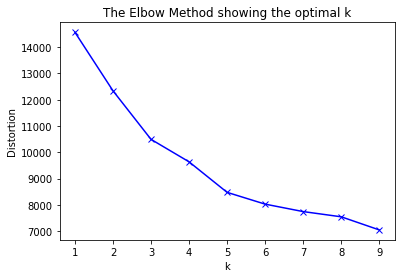

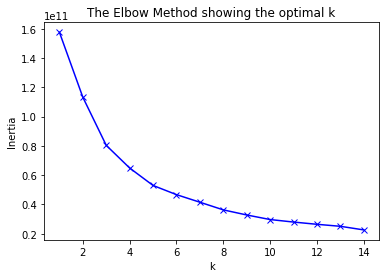

In [5]:
distortions_Inertia(data)

In [6]:
print("--k-means computation--")
# k-means algorithm where k = 9
km = KMeans(n_clusters=9)
# perform k-means clustering on the dataset
km.fit(data)
# print the 9 cluster centers
print(km.cluster_centers_)


print("\n--k-means prediction--")
print(pd.Series(km.predict(data)).value_counts().sort_index())


print("\n--PCA computation--")
# PCA computation by sklearn
pca = PCA(n_components=6)
# pca = PCA(n_components=2)

# Find the principle components of 6 features
X_r = pca.fit_transform(data)
print(X_r)

--k-means computation--
[[ 4443.22988506  8716.5862069  12616.68965517  1456.17241379
   5391.33333333  1512.42528736]
 [26442.36585366  5742.6097561   7438.75609756  4762.04878049
   1495.58536585  2359.09756098]
 [ 4850.65359477  2529.48366013  3074.4248366   2552.70588235
    828.58823529   840.76470588]
 [25603.         43460.6        61472.2         2636.
  29974.2         2708.8       ]
 [44408.10526316  3175.36842105  4057.47368421  4617.31578947
    757.          2159.05263158]
 [ 6683.06666667 17468.03333333 26658.93333333  1986.3
  11872.9         2531.2       ]
 [15681.19        2696.35        3696.58        3392.79
    822.89        1180.74      ]
 [85779.66666667 12503.66666667 12619.66666667 13991.66666667
   2159.          3958.        ]
 [34782.         30367.         16898.         48701.5
    755.5        26776.        ]]

--k-means prediction--
0     87
1     41
2    153
3      5
4     19
5     30
6    100
7      3
8      2
dtype: int64

--PCA computation--
[[   650.

## 4. Print out the explained variance for each principal component.
Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

In [7]:
# print(X_r)
# print("--")
print(pca.explained_variance_)
print("--")
print(pca.explained_variance_ratio_)
print("--")
print(pca.explained_variance_ratio_.cumsum())

[1.64995904e+08 1.45452098e+08 2.51399785e+07 1.58039005e+07
 5.39276364e+06 2.20364065e+06]
--
[0.45961362 0.40517227 0.07003008 0.04402344 0.01502212 0.00613848]
--
[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


## How to calculate the correlation of the principle components:

In [8]:
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(2.0816681711721685e-17, 1.0000000000001332)


In [9]:
# confusion = metrics.confusion_matrix(y_test, y_pred)
# print(confusion)

# TP = confusion[1, 1]
# TN = confusion[0, 0]
# FP = confusion[0, 1]
# FN = confusion[1, 0]


# accuracy=(𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
# print("𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦:", accuracy)

# error=(𝐹𝑃+𝐹𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
# print("𝑒𝑟𝑟𝑜𝑟 =1−𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦:", error)

# 𝑟𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁)
# print("𝑟𝑒𝑐𝑎𝑙𝑙", 𝑟𝑒𝑐𝑎𝑙𝑙)

# 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃)
# print("𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛", 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛)

# 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦=𝑇𝑁/(𝑇𝑁+𝐹𝑃)
# print("𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦", 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦)

# F1 = 2*(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 * 𝑟𝑒𝑐𝑎𝑙𝑙 )/(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 + 𝑟𝑒𝑐𝑎𝑙𝑙)
# print("f1", F1)